In [1]:
import pandas as pd

# Read the US pumpkin CSV file
pumpkins = pd.read_csv('US-pumpkins.csv')

#Filter out any rows that don't use price per bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
pumpkins.head()




,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
#find how many empty cells are there 
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:
# Define all the colums we need to keep
#new_colums = ['Package','Month','Low Price','High Price','Date']
# Drop all other colums
#pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_colums],axis=1)
#pumpkins.head()



In [4]:
from datetime import datetime

# calculate the average price from lowprice and high price
price = (pumpkins['Low Price'] + pumpkins['High Price']) /2
print(price)

# Get the month from the data column
month =  pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)
new_pumpkins = pd.DataFrame(
    {'Month': month,
     'DayOfYear' : day_of_year,
     'Variety': pumpkins['Variety'],
     'City': pumpkins['City Name'],
     'Package': pumpkins['Package'],
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'],
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_13680\2910188496.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [5]:
if 'Variety' in pumpkins.columns:
    pumpkins['Variety']
else:
    print("Column 'Variety' not found in DataFrame")


In [6]:
new_pumpkins.tail()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
1738,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.00
1739,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.75
1740,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.75
1741,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.00
1742,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.00


In [7]:
import matplotlib as plt

AttributeError: module 'matplotlib' has no attribute 'ylabel'

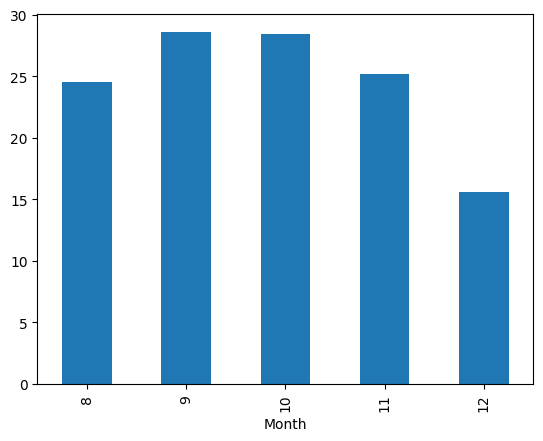

In [8]:
#price = new_pumpkins.Price
#month - new_pumpkins.Month

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [ ]:
import matplotlib.pyplot as plt

price = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price,month)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter('Month','Price',data=new_pumpkins)

In [ ]:
plt.scatter('DayOfYear','Price',data=new_pumpkins)


In [ ]:
#print the correlation between month and price
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))

In [ ]:
#define the colours to plot the pumkins
colors = ['red','blue','green','yellow']

ax = None
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df  = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

In [ ]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

# Lets consider only pie type

In [ ]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
print(pie_pumpkins['DayOfYear'].corr(pie_pumpkins['Price']))
pie_pumpkins.plot.scatter('DayOfYear','Price')

# Using Linear regression from sciki-learn to train above dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

In [ ]:
pred = lin_reg.predict(X_test)

In [ ]:
#takeing the mean square error to find the accuracy of the prediction
import numpy as np
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')


In [ ]:
# mse estimate that the accuracy of the prediction is not quite good enough
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [ ]:
#print the slope and the intercept
lin_reg.coef_, lin_reg.intercept_

In [ ]:
#predicting pumpkin price on 256 day
lin_reg.predict([[256]])

# Using Polynomial Regression for the prediction 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline = make_pipeline(PolynomialFeatures(2),LinearRegression())

In [ ]:
pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

# Need to encode the variety of pumpkins column by 4 different columns,one for each variety,that will contain 1 if the corresponding row  is of given variety and 0 otherwise

In [70]:
import pandas as pd
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,False,False,False,True
71,False,False,False,True
72,False,False,False,True
73,False,False,False,True
74,False,False,False,True
...,...,...,...,...
1738,False,True,False,False
1739,False,True,False,False
1740,False,True,False,False
1741,False,True,False,False


In [71]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [72]:
def run_linear_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)

    pred = lin_reg.predict(X_test)

    mse = np.sqrt(mean_squared_error(y_test,pred))
    print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

    score = lin_reg.score(X_train,y_train)
    print('Model determination: ', score)

run_linear_regression(X,y)

Mean error: 5.24 (19.7%)
Model determination:  0.774085281105197


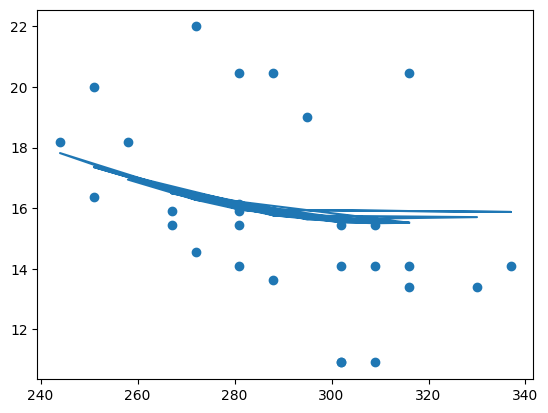

In [73]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [74]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

run_linear_regression(X,y)

Mean error: 2.84 (10.5%)
Model determination:  0.9401401953107826


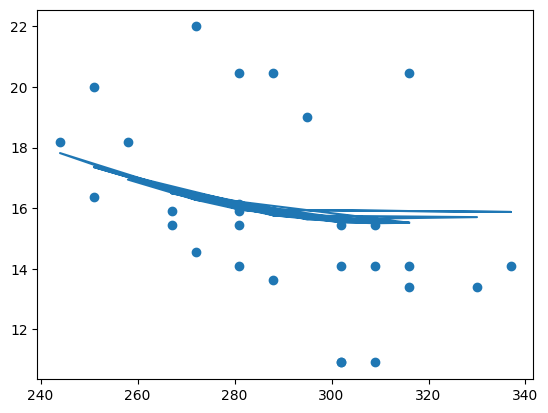

In [75]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

### Trying above with a polynomial regression model to check the accuracy of prediction(mse)

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.23 (8.28%)
Model determination:  0.9653029999448537


### so in above, polynomial regression model plays a good role sense of accuracy with a mean error with 2.23